<h2 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    HyperParameter Tuning for K-means model
</h2>

![alt text](1_OJ-dzKJdbwVJu_P7INWuyg.jpg)

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    K-means
</h6>

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Overview
</h6>

- K-Means is a clustering algorithm used to partition data into 𝑘 distinct clusters.



<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    How K-means Works
</h6>


1. **Initialization**: Select \( k \) initial centroids randomly from the data points.

2. **Assignment Step**: Assign each data point to the nearest centroid, creating \( k \) clusters.

3. **Update Step**: Calculate the new centroids as the mean of the data points in each cluster.

4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change significantly or a maximum number of iterations is reached.

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Choosing the Optimal K for K-means
</h6>

- Hyperparameter tuning involves various methods to optimize the performance of machine learning models. Here are Two common tuning methods:

### Hyperparameter Tuning Methods

1. **GridSearchCV**  
   - **Description**: Exhaustively searches over a specified grid of hyperparameters, evaluating every combination.
   - **Pros**: Comprehensive; finds the best combination within the grid.
   - **Cons**: Computationally expensive; slow for large grids.

2. **RandomizedSearchCV**  
   - **Description**: Randomly samples a fixed number of hyperparameter combinations from specified distributions.
   - **Pros**: More efficient for large spaces; covers a broader range.
   - **Cons**: May not find the absolute best combination.

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    import libraries, read the data
</h6>

In [1]:
# import the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, make_scorer
from scipy.stats import randint
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# read the dataset
df = pd.read_csv("facebook_live.csv", sep=";", parse_dates=["status_published"])
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Clean the dataframe
</h6>

In [3]:
# drop the "status_id" column
df = df.drop("status_id", axis=1)
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [4]:
# look at "status_type" column before converting it to numerical values
df["status_type"].value_counts()

status_type
photo     4286
video     2332
status     365
link        63
Name: count, dtype: int64

In [5]:
# convert the "status_type" column to numerical using onelabel encoding
df["status_type"] = pd.Categorical(df["status_type"])
df["status_type"] = df["status_type"].cat.codes
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [6]:
# look at "status_type" column after converting it to numerical values
df["status_type"].value_counts()

status_type
1    4286
3    2332
2     365
0      63
Name: count, dtype: int64

In [7]:
df.dtypes

status_type                   int8
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
dtype: object

In [8]:
# Extract date and time components from the "status_published" column
df['year'] = df['status_published'].dt.year
df['month'] = df['status_published'].dt.month
df['day'] = df['status_published'].dt.day
df['hour'] = df['status_published'].dt.hour
df['minute'] = df['status_published'].dt.minute

# drop the "status_published" column
df = df.drop("status_published", axis=1)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour,minute
0,3,529,512,262,432,92,3,1,1,0,2018,4,22,6,0
1,1,150,0,0,150,0,0,0,0,0,2018,4,21,22,45
2,3,227,236,57,204,21,1,1,0,0,2018,4,21,6,17
3,1,111,0,0,111,0,0,0,0,0,2018,4,21,2,29
4,1,213,0,0,204,9,0,0,0,0,2018,4,18,3,22


In [9]:
# check for missing values (no missing values)
df.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
year             0
month            0
day              0
hour             0
minute           0
dtype: int64

In [10]:
# check for data types (all data types are numerical)
df.dtypes

status_type       int8
num_reactions    int64
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
year             int32
month            int32
day              int32
hour             int32
minute           int32
dtype: object

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Apply the Two Tuning methods
</h6>

1- GridsearchCV.\
2- RandomizedSearchCV.

In [11]:
# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

In [12]:
# Extract feature columns
X = df

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Function to reduce dimensions and plot clusters
def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.colorbar(label='Cluster Label')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Apply K-Means Clustering
</h6>

In [14]:
from sklearn.cluster import KMeans

# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['kmeans_4_clusters'] = clusters

# Display the clustering results
print("K-Means Clustering with 4 Clusters")
df.head()


K-Means Clustering with 4 Clusters


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour,minute,kmeans_4_clusters
0,3,529,512,262,432,92,3,1,1,0,2018,4,22,6,0,0
1,1,150,0,0,150,0,0,0,0,0,2018,4,21,22,45,1
2,3,227,236,57,204,21,1,1,0,0,2018,4,21,6,17,0
3,1,111,0,0,111,0,0,0,0,0,2018,4,21,2,29,1
4,1,213,0,0,204,9,0,0,0,0,2018,4,18,3,22,1


In [15]:
print(df['kmeans_4_clusters'].value_counts())

kmeans_4_clusters
1    4312
0    2154
3     378
2     202
Name: count, dtype: int64


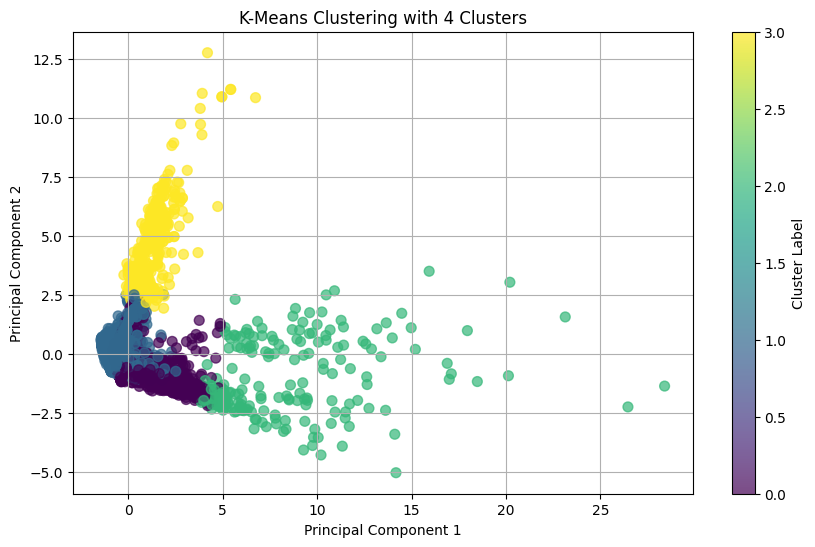

In [16]:
# Plot K-Means with 4 clusters
plot_clusters(X_scaled, df['kmeans_4_clusters'], 'K-Means Clustering with 4 Clusters')
plt.show()

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Apply GridSearchCV
</h6>

In [17]:
# Define a custom scorer for silhouette score
def silhouette_scorer(estimator, X):
    labels = estimator.predict(X)
    return silhouette_score(X, labels)

# Define parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300],
    'n_init': [10]  # Explicitly set n_init
}

# Create KMeans instance
kmeans = KMeans(random_state=42)

# GridSearchCV instance
grid_search = GridSearchCV(
    estimator=kmeans,
    param_grid=param_grid,
    cv=3,
    scoring=silhouette_scorer
)
grid_search.fit(X_scaled)

# Best parameters and score
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Best Silhouette Score from GridSearchCV:", grid_search.best_score_)

Best Parameters from GridSearchCV: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 10}
Best Silhouette Score from GridSearchCV: 0.6567895195832346


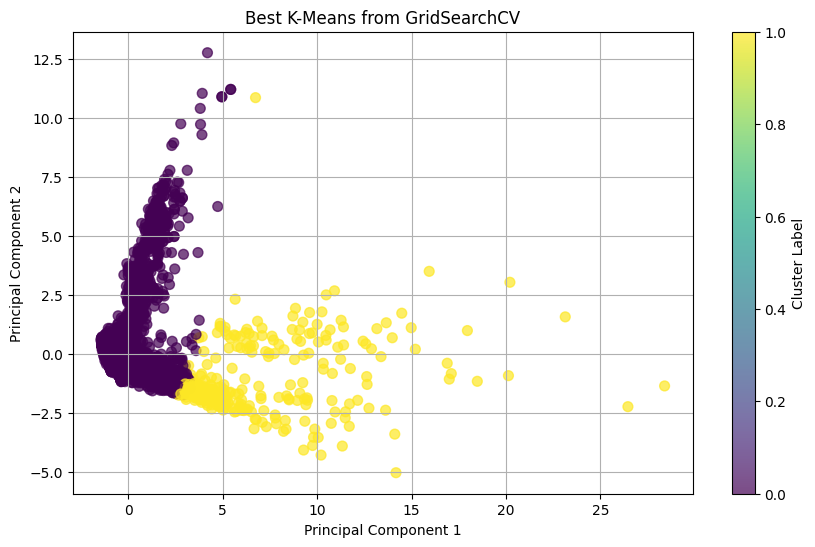

In [25]:
# Plot Best K-Means from GridSearchCV
plot_clusters(X_scaled, df['best_kmeans_grid'], 'Best K-Means from GridSearchCV')
plt.show()

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Apply RandomizedSearchCV
</h6>

In [19]:
# Define parameter distribution
param_dist = {
    'n_clusters': np.arange(2, 10),
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300],
    'n_init': [10]  # Explicitly set n_init
}

# Create KMeans instance
kmeans = KMeans(random_state=42)

# RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    estimator=kmeans,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring=silhouette_scorer,
    random_state=42
)
random_search.fit(X_scaled)

# Best parameters and score
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best Silhouette Score from RandomizedSearchCV:", random_search.best_score_)


Best Parameters from RandomizedSearchCV: {'n_init': 10, 'n_clusters': 2, 'max_iter': 300, 'init': 'random'}
Best Silhouette Score from RandomizedSearchCV: 0.6225184391900086


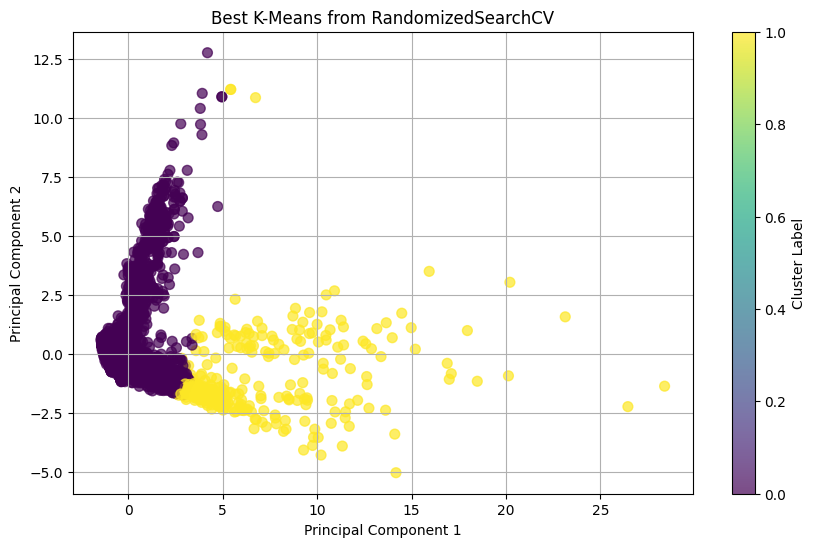

In [24]:
# Plot Best K-Means from RandomizedSearchCV
plot_clusters(X_scaled, df['best_kmeans_random'], 'Best K-Means from RandomizedSearchCV')
plt.show()

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Compare the results
</h6>

In [20]:
# Apply best KMeans from GridSearchCV
best_kmeans_grid = KMeans(
    n_clusters=grid_search.best_params_['n_clusters'],
    init=grid_search.best_params_['init'],
    max_iter=grid_search.best_params_['max_iter'],
    n_init=10,
    random_state=42
)
clusters_grid = best_kmeans_grid.fit_predict(X_scaled)
df['best_kmeans_grid'] = clusters_grid

# Apply best KMeans from RandomizedSearchCV
best_kmeans_random = KMeans(
    n_clusters=random_search.best_params_['n_clusters'],
    init=random_search.best_params_['init'],
    max_iter=random_search.best_params_['max_iter'],
    n_init=10,
    random_state=42
)
clusters_random = best_kmeans_random.fit_predict(X_scaled)
df['best_kmeans_random'] = clusters_random

# Display and compare the results
print("\nK-Means Clustering with 4 Clusters")
df[['kmeans_4_clusters']].value_counts()


K-Means Clustering with 4 Clusters


kmeans_4_clusters
1                    4312
0                    2154
3                     378
2                     202
Name: count, dtype: int64

In [21]:
print("\nBest K-Means from GridSearchCV")
df[['best_kmeans_grid']].value_counts()


Best K-Means from GridSearchCV


best_kmeans_grid
0                   6722
1                    324
Name: count, dtype: int64

In [22]:
print("\nBest K-Means from RandomizedSearchCV")
df[['best_kmeans_random']].value_counts()


Best K-Means from RandomizedSearchCV


best_kmeans_random
0                     6713
1                      333
Name: count, dtype: int64

In [23]:
# Calculate silhouette scores for each clustering
silhouette_4_clusters = silhouette_score(X_scaled, clusters)
silhouette_best_grid = silhouette_score(X_scaled, clusters_grid)
silhouette_best_random = silhouette_score(X_scaled, clusters_random)

print("\nSilhouette Score for K-Means with 4 Clusters:", silhouette_4_clusters)
print("Silhouette Score for Best K-Means from GridSearchCV:", silhouette_best_grid)
print("Silhouette Score for Best K-Means from RandomizedSearchCV:", silhouette_best_random)


Silhouette Score for K-Means with 4 Clusters: 0.1867087751985495
Silhouette Score for Best K-Means from GridSearchCV: 0.5849579172997285
Silhouette Score for Best K-Means from RandomizedSearchCV: 0.5831924671956229
